# **PROJECT SUMMARY**

**FicZon Inc is an IT solution provider with products ranging from on-premises products to SAS based solutions. FicZon major leads generation channel is digital and through their website**

**FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.**



# **PROBLEM STATEMENT**

*FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness*

**PROJECT GOAL:**

*Data exploration insights – Sales effectiveness.**

*ML model to predict the Lead Category.**

# **Business Case: Predicting the lead category whether it is Good or bad from the given sales dataset.**

# **Connecting to the server**

In [1]:
pip install mysql-connector

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import mysql.connector
import pandas as pd
import numpy as np

In [3]:
## making connections
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!')
print(connection)

In [4]:
## getting the database name
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)



('information_schema',)
('project_sales',)


In [5]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [6]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [7]:
query = "select * from data"

In [8]:
Sales_Data = pd.read_sql(query,connection)

In [9]:
Sales_Data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# **DOMAIN ANALYSIS**

Created -  date and time of lead generrated

Product_ID - Product id of the each products 

Source - The channel through which a lead initially discovers the company

Sales Agent - A person or a company that acts as a sales agent on behalf of the company, introducing its products to the leads.

Location - locations of the leads

Delivery_Mode - mode of the delivery according to the location

Status - (the target variable) The field is typically used to communicate the status of a record to both the reporting users and the sales rep who is working the lead. 
The reporting user wants to see explicit detail while the sales rep wants to update the record in a natural and efficient manner.

# **Basic Checks**

In [10]:
Sales_Data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [11]:
Sales_Data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [12]:
Sales_Data.Source

0                Website
1                Website
2                Website
3                Website
4                Website
              ...       
7417                Call
7418                Call
7419    Live Chat-Direct
7420            CRM form
7421             Website
Name: Source, Length: 7422, dtype: object

In [13]:
Sales_Data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [14]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [15]:
# target class count
Sales_Data["Status"].value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [16]:
Sales_Data["Source"].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

# **Exploratory Data Analysis**

In [17]:
Sales_Data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [18]:
Sales_Data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [19]:
Sales_Data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [20]:
# Splitting Created Column to to convert date and time, so that our model will work efficiently.
Sales_Data[['Created_date','Created_time']] = Sales_Data['Created'].str.split(' ', n=1, expand=True)
Sales_Data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_date,Created_time
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,14-11-2018,10:05
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:22
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,09:21
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,08:46
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14-11-2018,07:34
...,...,...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,28-04-2018,09:45
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,28-04-2018,09:43
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28-04-2018,09:20
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28-04-2018,08:04


In [21]:
# Extracting Hours
Sales_Data["Created_hour"] = pd.to_datetime(Sales_Data["Created_time"]).dt.hour

# Extracting Minutes
Sales_Data["Created_min"] = pd.to_datetime(Sales_Data["Created_time"]).dt.minute

In [22]:
Sales_Data["Created_day"] = pd.to_datetime(Sales_Data.Created_date, format="%d-%m-%Y").dt.day
Sales_Data["Created_month"] = pd.to_datetime(Sales_Data["Created_date"], format = "%d-%m-%Y").dt.month
Sales_Data["Created_year"] = pd.to_datetime(Sales_Data.Created_date, format="%d-%m-%Y").dt.year

In [23]:
Sales_Data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status', 'Created_date', 'Created_time',
       'Created_hour', 'Created_min', 'Created_day', 'Created_month',
       'Created_year'],
      dtype='object')

In [24]:
Sales_Data.drop(['Created','Created_date','Created_time'], axis=1, inplace=True) # Dropping columns after conversion.

In [25]:
Sales_Data.head()

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month,Created_year
0,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,10,5,14,11,2018
1,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,9,22,14,11,2018
2,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,9,21,14,11,2018
3,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,8,46,14,11,2018
4,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,7,34,14,11,2018


In [26]:
# Dropping Mobile and Email because it contains all unique & unspecified values and dropping Created_year also because its all 2018.
Sales_Data.drop(['Mobile','EMAIL','Created_year'], axis=1, inplace=True)

In [27]:
Sales_Data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,,Website,Sales-Agent-11,,Mode-5,Open,10,5,14,11
1,,Website,Sales-Agent-10,,Mode-5,Open,9,22,14,11
2,,Website,Sales-Agent-10,,Mode-5,Open,9,21,14,11
3,,Website,Sales-Agent-10,,Mode-5,Open,8,46,14,11
4,,Website,Sales-Agent-10,,Mode-5,Open,7,34,14,11


# **Univariate Analysis**

In [28]:
! pip install sweetviz

In [29]:
import sweetviz as sv
my_report=sv.analyze(Sales_Data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [30]:
# Defining 'Status' as 'Good' or 'Bad'
Sales_Data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
Sales_Data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [31]:
Sales_Data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,,Website,Sales-Agent-11,,Mode-5,Good,10,5,14,11
1,,Website,Sales-Agent-10,,Mode-5,Good,9,22,14,11
2,,Website,Sales-Agent-10,,Mode-5,Good,9,21,14,11
3,,Website,Sales-Agent-10,,Mode-5,Good,8,46,14,11
4,,Website,Sales-Agent-10,,Mode-5,Good,7,34,14,11
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,Bad,9,45,28,4
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,Bad,9,43,28,4
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Bad,9,20,28,4
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Bad,8,4,28,4


In [32]:
Sales_Data['Location'].value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [33]:
Sales_Data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
Sales_Data.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [34]:
Sales_Data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,,Website,Sales-Agent-11,,Mode-5,Good,10,5,14,11
1,,Website,Sales-Agent-10,,Mode-5,Good,9,22,14,11
2,,Website,Sales-Agent-10,,Mode-5,Good,9,21,14,11
3,,Website,Sales-Agent-10,,Mode-5,Good,8,46,14,11
4,,Website,Sales-Agent-10,,Mode-5,Good,7,34,14,11
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,Bad,9,45,28,4
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,Bad,9,43,28,4
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Bad,9,20,28,4
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Bad,8,4,28,4


In [35]:
Sales_Data.Source.unique()

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [36]:
Sales_Data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
Sales_Data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
Sales_Data.replace('By Recommendation','Customer Referral',inplace=True)
Sales_Data.replace(['US Website','Just Dial'],'Website',inplace=True)
Sales_Data.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [37]:
Sales_Data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,,Website,Sales-Agent-11,,Mode-5,Good,10,5,14,11
1,,Website,Sales-Agent-10,,Mode-5,Good,9,22,14,11
2,,Website,Sales-Agent-10,,Mode-5,Good,9,21,14,11
3,,Website,Sales-Agent-10,,Mode-5,Good,8,46,14,11
4,,Website,Sales-Agent-10,,Mode-5,Good,7,34,14,11


In [38]:
#From the graph we can say that these are the product id's of less sold product so we replace with less sold product
Sales_Data.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Less Sold Product',inplace=True)

In [39]:
# Dropping rows with missing data because they are few
Sales_Data.replace('',np.nan,inplace=True)
Sales_Data.dropna(inplace=True)
Sales_Data.reset_index(inplace=True,drop=True)
Sales_Data.shape

(7328, 10)

In [40]:
Sales_Data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_hour,Created_min,Created_day,Created_month
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Good,18,51,13,11
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good,18,48,13,11
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,Good,17,9,13,11
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad,16,49,13,11
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,Good,16,37,13,11
...,...,...,...,...,...,...,...,...,...,...
7323,9,Call,Sales-Agent-6,Mumbai,Mode-4,Bad,9,45,28,4
7324,15,Call,Sales-Agent-12,Other Locations,Mode-5,Bad,9,43,28,4
7325,5,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Bad,9,20,28,4
7326,Less Sold Product,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Bad,8,4,28,4


# **Univariate analysis of categorical variables**

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

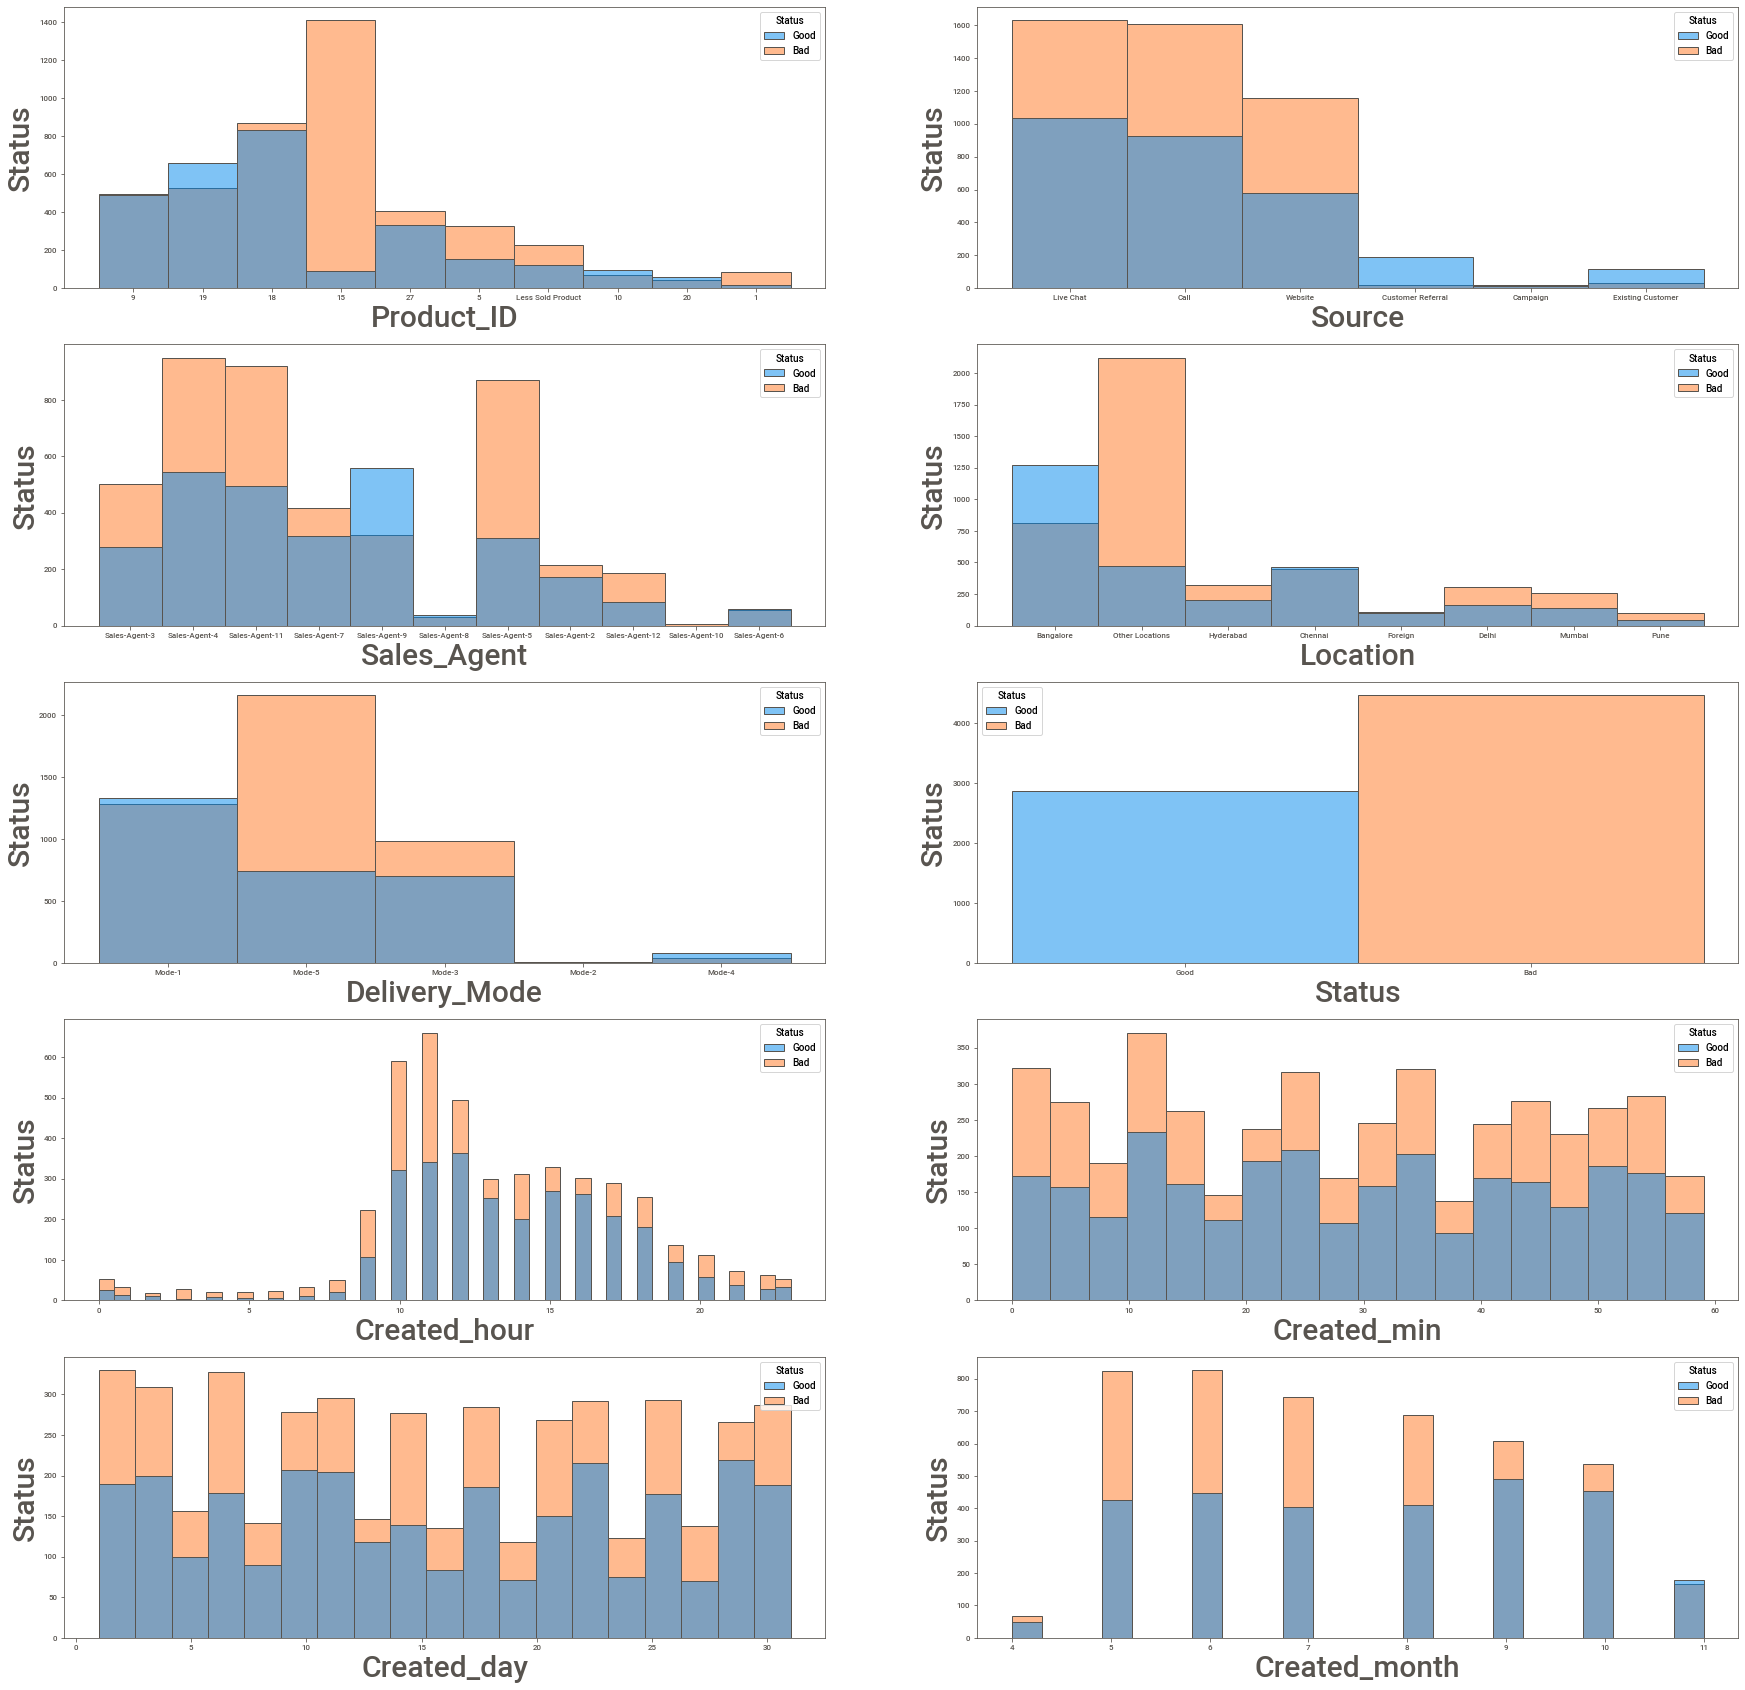

In [42]:
plt.figure(figsize=(30,30), facecolor='white')
plotnumber = 1

for column in Sales_Data:
    if plotnumber<=10 : # as there are 10 columns in the dataset.
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=Sales_Data[column],hue=Sales_Data.Status)
        plt.xlabel(column,fontsize=30)
        plt.ylabel('Status',fontsize=30)
    plotnumber+=1
plt.show()

# **From Above graphical representation and from sweetviz analysis we get insights:-**

1) Product ID 15 has highest number of Nonpotential lead.

2) Delivery_Mode Mode-1 has only Potential Lead and Mode-4 also but having really less amount of deliveries from Mode-4.

3) There are most number of lead from Other Locations and having most number of Nonpotential Lead.

4) Sales_Agent 4,5 and 11 provides maximum no. of lead but most of them are Nonpotential.

5) From Source Call, Live Chat-Direct and Website we are getting highest no. of lead.

# **Handling Categorical Data**

In [43]:
# Converting Source using Frequency encoder
# grouping by frequency
fq = Sales_Data.groupby('Source').size()/len(Sales_Data)
# mapping values to dataframe
Sales_Data.loc[:, "{}_freq_encode".format('Source')] = Sales_Data['Source'].map(fq)
# drop original column.
Sales_Data = Sales_Data.drop(['Source'], axis = 1)

In [44]:
Sales_Data.Sales_Agent.unique()

array(['Sales-Agent-3', 'Sales-Agent-4', 'Sales-Agent-11',
       'Sales-Agent-7', 'Sales-Agent-9', 'Sales-Agent-8', 'Sales-Agent-5',
       'Sales-Agent-2', 'Sales-Agent-12', 'Sales-Agent-10',
       'Sales-Agent-6'], dtype=object)

In [45]:
# Handling Sales_Agent using Label Encoder.
Sales_Data.replace({'Sales-Agent-1': 1, 'Sales-Agent-2': 2, 'Sales-Agent-3': 3, 'Sales-Agent-4': 4, 'Sales-Agent-5': 5, 'Sales-Agent-6': 6, 'Sales-Agent-7': 7,'Sales-Agent-8': 8,'Sales-Agent-9': 9,'Sales-Agent-10': 10,'Sales-Agent-11': 11,'Sales-Agent-12': 12},inplace=True) 

In [46]:
# Converting Location using Frequency encoder
# grouping by frequency
fq1 = Sales_Data.groupby('Location').size()/len(Sales_Data)
# mapping values to dataframe
Sales_Data.loc[:, "{}_freq_encode".format('Location')] = Sales_Data['Location'].map(fq1)
# drop original column.
Sales_Data = Sales_Data.drop(['Location'], axis = 1)

In [47]:
# As Delivery_Mode is Nominal Categorical data we will perform OneHotEncoding

Delivery_Mode = Sales_Data[["Delivery_Mode"]]

Delivery_Mode = pd.get_dummies(Delivery_Mode)

Sales_Data = pd.concat([Sales_Data,Delivery_Mode],axis=1)

In [48]:
Sales_Data.drop(['Delivery_Mode'], axis =1, inplace= True)

In [49]:
# Converting Status
Sales_Data.replace({'Bad': 0, 'Good': 1}, inplace = True)

In [50]:
Sales_Data

,Product_ID,Sales_Agent,Status,Created_hour,Created_min,Created_day,Created_month,Source_freq_encode,Location_freq_encode,Delivery_Mode_Mode-1,Delivery_Mode_Mode-2,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5
0,9,3,1,18,51,13,11,0.363401,0.283706,1,0,0,0,0
1,19,4,1,18,48,13,11,0.346070,0.354121,0,0,0,0,1
2,18,11,1,17,9,13,11,0.236900,0.354121,1,0,0,0,0
3,15,7,0,16,49,13,11,0.236900,0.071916,1,0,0,0,0
4,18,7,1,16,37,13,11,0.346070,0.283706,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,9,6,0,9,45,28,4,0.346070,0.054449,0,0,0,1,0
7324,15,12,0,9,43,28,4,0.346070,0.354121,0,0,0,0,1
7325,5,11,0,9,20,28,4,0.363401,0.283706,1,0,0,0,0
7326,Less Sold Product,4,0,8,4,28,4,0.019787,0.354121,1,0,0,0,0


In [51]:
Sales_Data.replace({'Less Sold Product':1},inplace=True)

# **Feature Selection**

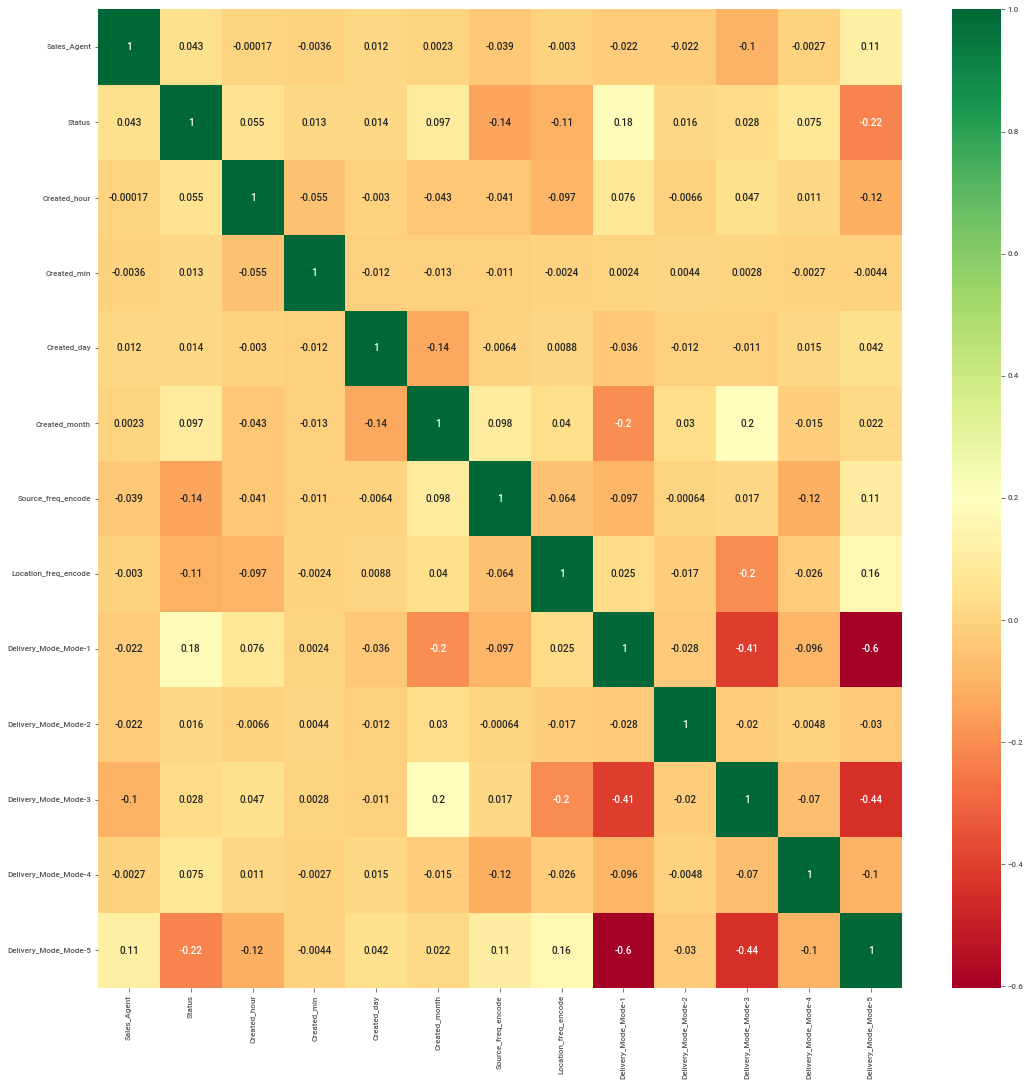

In [52]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(Sales_Data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [53]:
# Creating Dependent and independent variable
x=Sales_Data.drop(columns = ['Status']) ## independent varable
y=Sales_Data['Status'] ## dependent or target variable

In [54]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

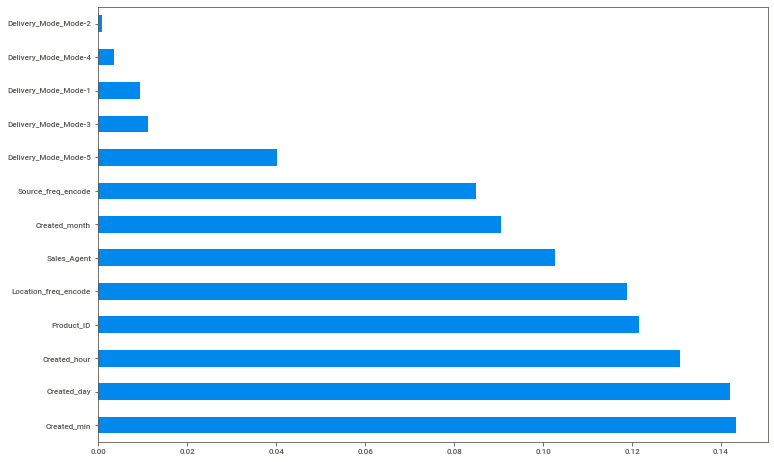

In [55]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

From Above Representation it is concluded that Creation Period, Product_ID, Location and Sales_Agent really effects the Status of lead.

# **Checking the dataset**

In [56]:
# target class count
Sales_Data["Status"].value_counts()

0    4466
1    2862
Name: Status, dtype: int64

Text(0.5, 1.0, 'target variable')

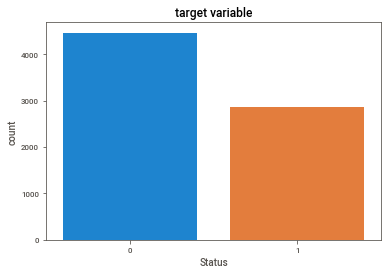

In [57]:
sns.countplot(Sales_Data["Status"])
plt.title("target variable")

from the graph it is shown that dataset is imbalance

# **Handling the Inbalanced dataset**

In [58]:
!pip install imblearn

In [59]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
x_sm,y_sm=sm.fit_resample(x,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 4466, 1: 2862})
Counter({1: 4466, 0: 4466})


# **Model Creation**

In [60]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size= 0.25,random_state=42)

# **Using Logistic Regression**

In [61]:
## model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [62]:
y_pred = log_reg.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74      1081
           1       0.62      0.34      0.44       751

    accuracy                           0.65      1832
   macro avg       0.64      0.60      0.59      1832
weighted avg       0.64      0.65      0.62      1832



In [64]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred)
score

0.5985432928774584

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.72806138 0.74728595 0.6908469  0.67262273 0.61456824]
Cross validation Score: 0.6906770414821869
Std : 0.04630484545033092


# Using Decision Tree Classifier 

In [66]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(x_train,y_train)#training the model
y_hat=dt.predict(x_test)#prediction
y_hat#predicted values 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    #importing mertics to check model performance
##Training score
y_train_predict=dt.predict(x_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

0.7727438136826783

In [68]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accur

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      3385
           1       0.78      0.57      0.66      2111

    accuracy                           0.77      5496
   macro avg       0.77      0.74      0.74      5496
weighted avg       0.77      0.77      0.76      5496



In [69]:
pd.crosstab(y_train,y_train_predict)#it will show you confusion matrix

col_0,0,1
Status,,
0,3035,350
1,899,1212


In [70]:
train_f1=f1_score(y_train,y_train_predict)
train_f1

0.6599509937380887

In [71]:
## test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.6708515283842795

In [72]:
## test score
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.5314685314685315

In [73]:
print(classification_report(y_test,y_hat))# for  testing

              precision    recall  f1-score   support

           0       0.68      0.82      0.75      1081
           1       0.64      0.46      0.53       751

    accuracy                           0.67      1832
   macro avg       0.66      0.64      0.64      1832
weighted avg       0.67      0.67      0.66      1832



In [74]:
pd.crosstab(y_test,y_hat)# confusion matrix for

col_0,0,1
Status,,
0,887,194
1,409,342


# **Hyperparameter Tuning for Decision Tree**

In [75]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [76]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 2, 'splitter': 'best'})


In [77]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 11,
 'min_samples_split': 2,
 'splitter': 'best'}

In [78]:
tree_cv.best_score_#getting best score from cv

0.5928134870924974

In [79]:
dt.fit(x_train,y_train)#traing model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

In [80]:
y_hat=dt.predict(x_test)#predicting
#y_hat1

In [81]:
acc_test=accuracy_score(y_test,y_hat)#checking accuracy
acc_test

0.6855895196506551

In [82]:
test_f1=f1_score(y_test,y_hat)#f1_score
test_f1

0.585014409221902

In [83]:
print(classification_report(y_test,y_hat))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1081
           1       0.64      0.54      0.59       751

    accuracy                           0.69      1832
   macro avg       0.67      0.66      0.67      1832
weighted avg       0.68      0.69      0.68      1832



[Text(0.4613210227272727, 0.9545454545454546, 'X[0] <= 16.504\nentropy = 0.961\nsamples = 5496\nvalue = [3385, 2111]'),
 Text(0.27095170454545453, 0.8636363636363636, 'X[0] <= 10.603\nentropy = 0.842\nsamples = 2712\nvalue = [1978, 734]'),
 Text(0.14985795454545456, 0.7727272727272727, 'X[0] <= 1.596\nentropy = 0.981\nsamples = 1600\nvalue = [930, 670]'),
 Text(0.07130681818181818, 0.6818181818181818, 'X[12] <= 0.692\nentropy = 0.884\nsamples = 361\nvalue = [252, 109]'),
 Text(0.03102272727272727, 0.5909090909090909, 'X[6] <= 0.04\nentropy = 0.932\nsamples = 227\nvalue = [148, 79]'),
 Text(0.01090909090909091, 0.5, 'X[2] <= 18.838\nentropy = 0.994\nsamples = 33\nvalue = [15, 18]'),
 Text(0.00909090909090909, 0.4090909090909091, 'X[7] <= 0.334\nentropy = 1.0\nsamples = 30\nvalue = [15, 15]'),
 Text(0.007272727272727273, 0.3181818181818182, 'X[7] <= 0.085\nentropy = 0.991\nsamples = 27\nvalue = [12, 15]'),
 Text(0.0036363636363636364, 0.22727272727272727, 'X[5] <= 4.216\nentropy = 0.722\

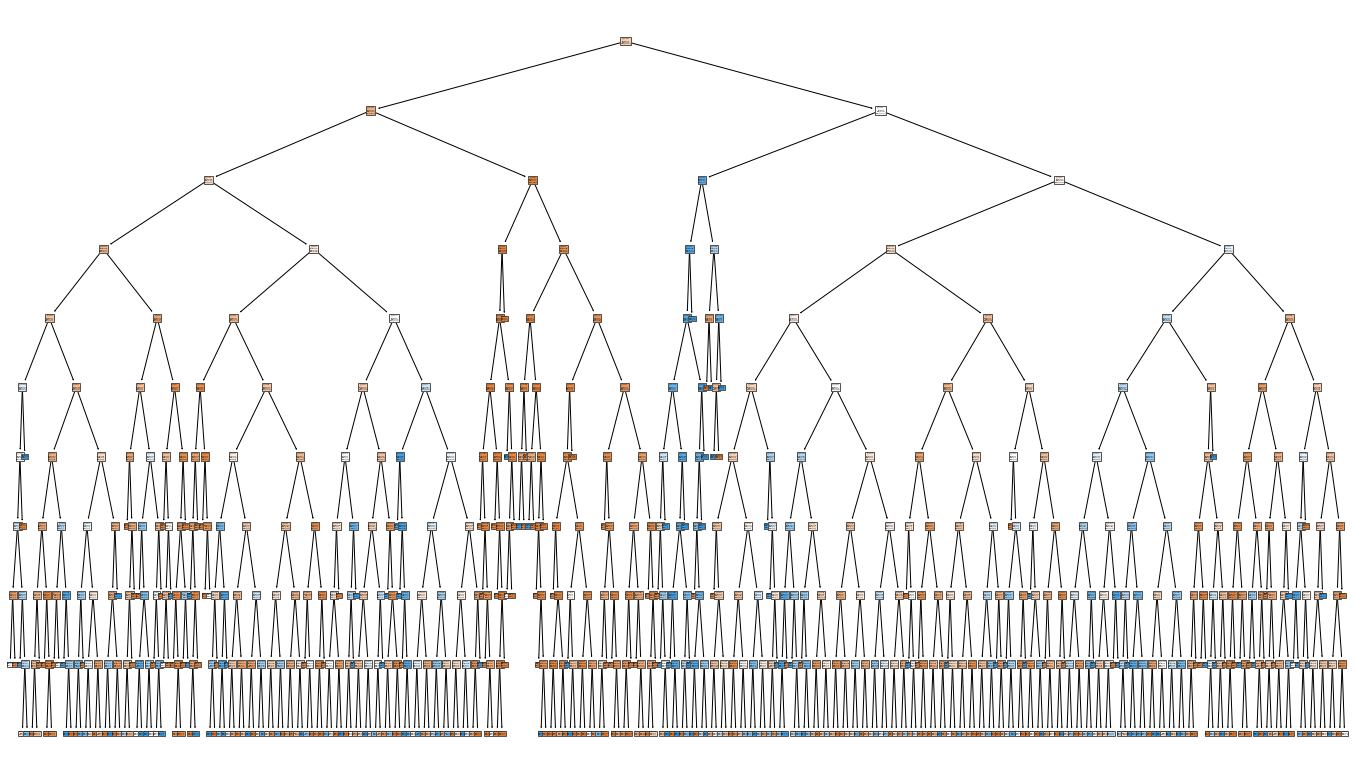

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(24,14))
plot_tree(dt, filled=True)

# **Using Random Forest Classifier**

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred3=rf_clf.predict(x_test)

In [87]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1081
           1       0.68      0.53      0.60       751

    accuracy                           0.71      1832
   macro avg       0.70      0.68      0.68      1832
weighted avg       0.70      0.71      0.70      1832



In [88]:
score=roc_auc_score(y_test,y_pred3)
score

0.679670399381152

In [89]:
scores = cross_val_score(rf_clf,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.72634061 0.45863992 0.50971805 0.641812   0.67336177]
Cross validation Score: 0.601974468737458
Std : 0.10119896571229234


# **Hyperparameter tuning for Random Forest Classifer**

In [90]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False})


In [91]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(x_train, y_train)
y_predict=rf_clf2.predict(x_test)

In [92]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77      1081
           1       0.69      0.50      0.58       751

    accuracy                           0.71      1832
   macro avg       0.70      0.67      0.68      1832
weighted avg       0.70      0.71      0.69      1832



In [93]:
score=roc_auc_score(y_test,y_predict)
score

0.6744211541564685

In [94]:
scores = cross_val_score(rf_clf2,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.74309004 0.51775786 0.54039166 0.6589617  0.69640326]
Cross validation Score: 0.6313209025913984
Std : 0.0879281077390906


# **Using Support Vector Machines**

In [95]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)

In [96]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1081
           1       0.00      0.00      0.00       751

    accuracy                           0.59      1832
   macro avg       0.30      0.50      0.37      1832
weighted avg       0.35      0.59      0.44      1832



In [97]:
score=roc_auc_score(y_test,y_pred2)
score

0.5

In [98]:
scores = cross_val_score(svc,x,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.63898384 0.6874371  0.65523263 0.65112491 0.54605753]
Cross validation Score: 0.6357671998384191
Std : 0.047629219535246105


# **Using Artificial Neural Network (ANN)**

In [99]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3), # 1st hidden layer with 50units and 2nd hidden layer will have 3unitslearning_rate_init=0.1, # The initial learning rate used. It controls the step-size in updating the weights.  
                       max_iter=100, # Maximum number of iterations. default=200. This is called as stopping criteria.
                       random_state=2) 

model.fit(x_train,y_train) ## training the data

y_predict_proba = model.predict_proba(x_test) ## predicting the probability of class
y_predict_proba

array([[0.62919177, 0.37080823],
       [0.59222187, 0.40777813],
       [0.7207892 , 0.2792108 ],
       ...,
       [0.67000952, 0.32999048],
       [0.61051108, 0.38948892],
       [0.74823157, 0.25176843]])

In [100]:
y_predict = model.predict(x_test) # Predicting for X_test

y_train_predict = model.predict(x_train) # predicting for X_train

In [101]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix

print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.6761280931586608
Test accuracy : 0.6468340611353712


In [102]:
## getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1081
           1       0.60      0.42      0.49       751

    accuracy                           0.65      1832
   macro avg       0.63      0.61      0.61      1832
weighted avg       0.64      0.65      0.63      1832



# **Using Naive Bayes Bernoulli**

In [103]:
## Model creation
from sklearn.naive_bayes import BernoulliNB

## model object creation
nb=BernoulliNB(alpha=0.01) #alpha is a regularization parameter # Avoid overfitting.

## fitting the model
nb.fit(x_train,y_train)

## getting the prediction
y_hat=nb.predict(x_test) 

In [104]:
y_hat

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [105]:
## Evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1081
           1       0.55      0.50      0.53       751

    accuracy                           0.63      1832
   macro avg       0.61      0.61      0.61      1832
weighted avg       0.62      0.63      0.63      1832



# **CONCLUSION**

**Data Analysis**

  The data is supervised and categorical. The predictor variables are nominal. The target variable 'Status' is nominal as  well.

  Most of the columns had a lot of different labels, so we compressed and merged the labels such that only the main ones were     included and then used Label Encoding. The predictor variable was categorized into two types 'Good Lead' and 'Bad Lead'.

 
  SMOTE is used ajdusting the sampling data. For training the data and predicting the target, algorithms used are Logistic       .Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes and  Artificial Neural Network 
 

 **Summary**
    
The project is done with the purpose of finding out the Lead Quality, whether the lead should be followed or not. The company motive is to invest in the right prospects. So therefore we divided the Lead as 'Good' or 'Bad'. This resulted in increase of accuracy drastically. 
     
After considering the performance of all the models on the basis of Accuracy, f1 Score, ruc score and cross-validation it is concluded that **Random Forest should be selected as our final model**.
 
 